# Мещерякова Ксения, 932003


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from joblib import dump
import pickle

### Датасет содержит данные, относящиеся к образцам красного Винью-Верде с севера Португалии

In [2]:
#открываем файл с данными и выводим на экран
data = pd.read_csv("winequality-red.csv", sep=";", index_col = 0)
data=data.reset_index()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#Выводим первые 5 записей
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Выводим последние 5 записей
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#Описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Метод data.info() выводит информацию о данных: названия столбцов, количество ненулевых значений, тип данных и использование памяти. В данном датасете нет нулевых значений, у всех столбцов тип данных числовой(float), за исключением "quality" (у данного столца тип данных числовой(int))

In [6]:
#Статистика данных
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Метод data.describe() для числовых данных включает: 
* count - количество значений
* mean - среднее значение
* std - среднеквадратичное отклонение
* min - минимальное значение
* max - максимальное значение
* нижний(25) процентиль
* средний(50) процентиль
* верхний(75) процентиль

In [7]:
# Проверим данные на количество пропущенных значений
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Выбор признаков для анализа
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                     'total sulfur dioxide', 'density', 'pH', 'sulphates',
                     'alcohol', 'quality']

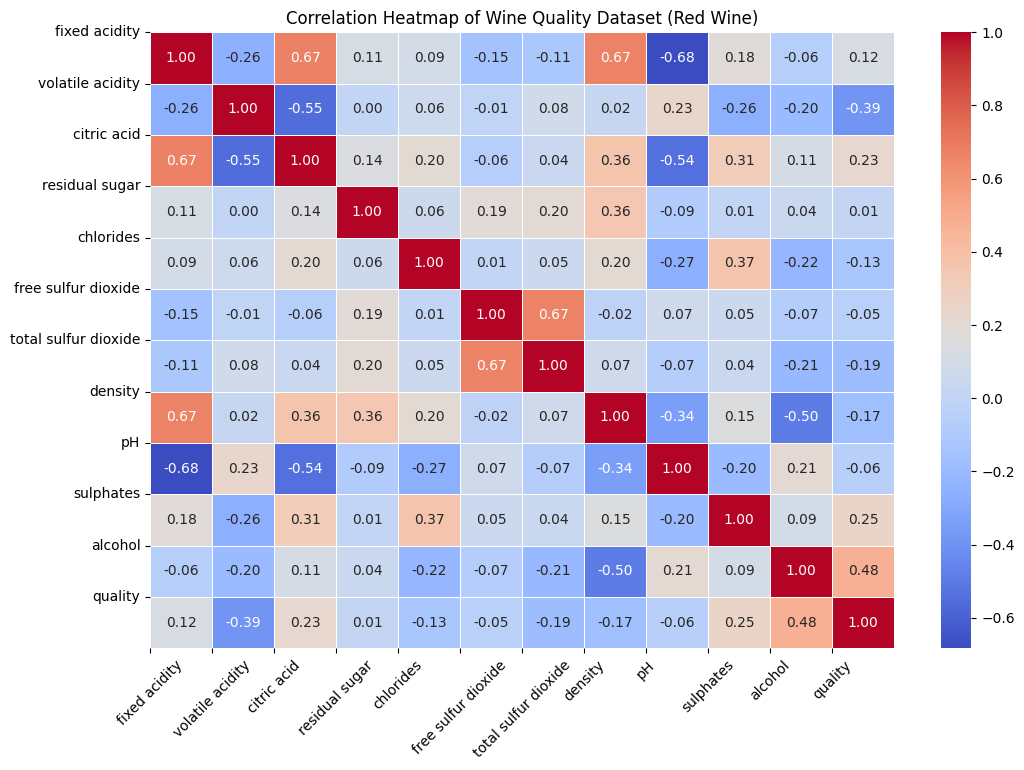

In [12]:
# Создание подмножества данных только с выбранными признаками
subset_data = data[selected_features]

# Рассчитываем корреляцию между признаками
correlation_matrix = subset_data.corr()

# Настройка параметров графика
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Добавление названий признаков на оси X и Y
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.yticks(range(len(selected_features)), selected_features, rotation=0)

# Отображение корреляционной тепловой карты
plt.title('Correlation Heatmap of Wine Quality Dataset (Red Wine)')
plt.show()

In [3]:
# Предобработка данных
features = data.drop('quality', axis=1)
target = data['quality']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [4]:
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [5]:
# Обучение различных моделей
# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Полиномиальная регрессия
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [7]:
# Случайный лес
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, param_grid={'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}, cv=5)
rf_grid.fit(X_train, y_train)
rf_model_best = rf_grid.best_estimator_

In [8]:
# SVR
svr_model = SVR()
svr_grid = GridSearchCV(svr_model, param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}, cv=5)
svr_grid.fit(X_train, y_train)
svr_model_best = svr_grid.best_estimator_

In [9]:
# Выводим важность признаков для случайного леса
feature_importances = rf_model_best.feature_importances_
print("Важность признаков:", feature_importances)

Важность признаков: [0.05218874 0.1072638  0.04824981 0.05884278 0.06936955 0.04819463
 0.07817613 0.05355637 0.06128938 0.15159198 0.27127683]


In [10]:
# Случайный лес
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
rf_model_best = rf_grid.best_estimator_
print("Наилучшие параметры для случайного леса:", rf_grid.best_params_)

Наилучшие параметры для случайного леса: {'max_depth': 30, 'n_estimators': 300}


In [11]:
# Градиентный бустинг
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train)
gb_model_best = gb_grid.best_estimator_
print("Наилучшие параметры для градиентного бустинга:", gb_grid.best_params_)


Наилучшие параметры для градиентного бустинга: {'learning_rate': 0.05, 'n_estimators': 200}


In [12]:
# SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
svm_model = SVR()
svm_grid = GridSearchCV(svm_model, param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error')
svm_grid.fit(X_train, y_train)
svm_model_best = svm_grid.best_estimator_
print("Наилучшие параметры для SVM:", svm_grid.best_params_)


Наилучшие параметры для SVM: {'C': 1, 'epsilon': 0.2}


In [52]:
# Выбор лучшей модели и её сохранение
models = [linear_model, poly_model, rf_model_best, svm_model_best]
best_model = sorted([(model, mean_squared_error(y_test, model.predict(X_test))) for model in models], key=lambda x: x[1])[0][0]

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Модель с наименьшей ошибкой на тестовых данных выбирается, как лучшая модель и сохраняется в файл 'best_model.joblib'

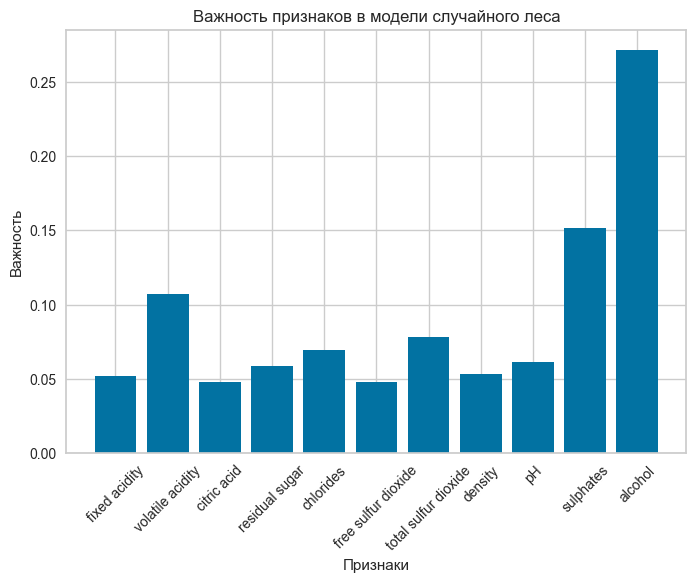

In [42]:
# График важности признаков для случайного леса
feature_importances = rf_model_best.feature_importances_
features_list = list(features.columns)
plt.bar(features_list, feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в модели случайного леса')
plt.xticks(rotation=45)
plt.show()

Высокие столбцы обозначают большую важность признаков, а низкие — меньшую. Следовательно, высокую важность составляет alcohol

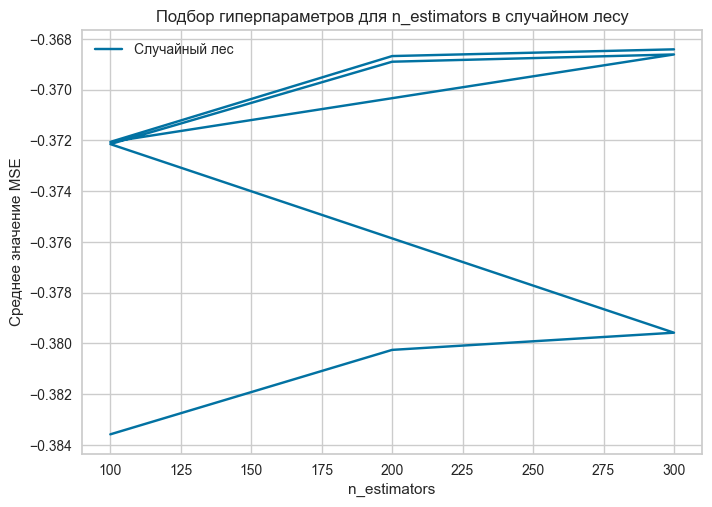

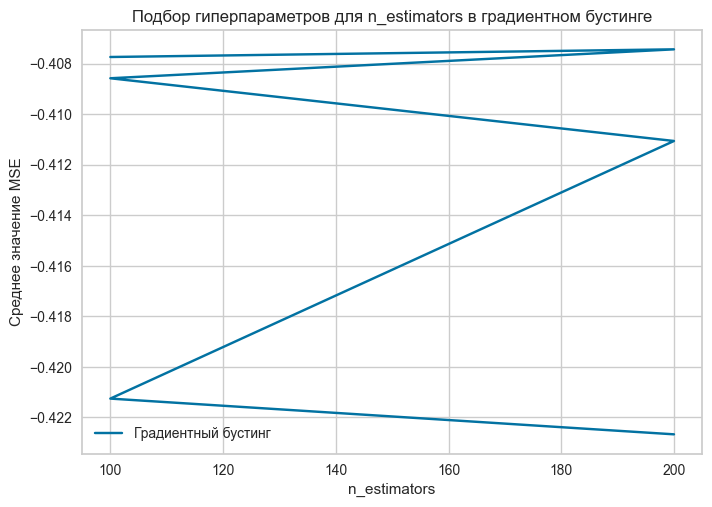

In [44]:
# Графики результатов подбора гиперпараметров
rf_results = pd.DataFrame(rf_grid.cv_results_)
plt.plot(rf_results['param_n_estimators'], rf_results['mean_test_score'], label='Случайный лес')
plt.xlabel('n_estimators')
plt.ylabel('Среднее значение MSE')
plt.title('Подбор гиперпараметров для n_estimators в случайном лесу')
plt.legend()
plt.show()

gb_results = pd.DataFrame(gb_grid.cv_results_)
plt.plot(gb_results['param_n_estimators'], gb_results['mean_test_score'], label='Градиентный бустинг')
plt.xlabel('n_estimators')
plt.ylabel('Среднее значение MSE')
plt.title('Подбор гиперпараметров для n_estimators в градиентном бустинге')
plt.legend()
plt.show()

Графики позволяют сравнить, как каждая модель реагирует на изменение значения гиперпараметров. Скачущий график может свидетельствовать о том, что изменение значения гиперпараметра "n_estimators" существенно влияет на производительность модели. Это может указывать на неустойчивость модели при различных значениях данного гиперпараметра.

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Линейная регрессия
linear_r2 = linear_model.score(X_test, y_test)
linear_mse = mean_squared_error(y_test, linear_model.predict(X_test))
linear_mae = mean_absolute_error(y_test, linear_model.predict(X_test))
print("Линейная регрессия - R^2:", linear_r2, "MSE:", linear_mse, "MAE:", linear_mae)

Линейная регрессия - R^2: 0.4031803412796219 MSE: 0.39002514396395493 MAE: 0.5035304415524375


* Значение R^2 равное 0.403 указывает на то, что примерно 40.3% вариации зависимой переменной может быть объяснено использованной моделью. Чем ближе значение к 1, тем лучше модель объясняет вариацию данных.
* Значение MSE равное 0.390 означает, что средняя ошибка предсказания модели составляет примерно 0.390
* Значение MAE равное 0.503 указывает на среднюю абсолютную ошибку предсказаний модели.

In [20]:
# Полиномиальная регрессия
poly_r2 = poly_model.score(X_test, y_test)
poly_mse = mean_squared_error(y_test, poly_model.predict(X_test))
poly_mae = mean_absolute_error(y_test, poly_model.predict(X_test))
print("Полиномиальная регрессия - R^2:", poly_r2, "MSE:", poly_mse, "MAE:", poly_mae)

Полиномиальная регрессия - R^2: 0.41568006441028504 MSE: 0.38185650165750135 MAE: 0.49477399099948477


* Значение R^2 равное 0.416 указывает на то, что примерно 41.6% вариации зависимой переменной может быть объяснено использованной моделью. Чем ближе значение к 1, тем лучше модель объясняет вариацию данных.
* Значение MSE равное 0.382 означает, что средняя ошибка предсказания модели составляет примерно 0.390
* Значение MAE равное 0.495 указывает на среднюю абсолютную ошибку предсказаний модели.

In [21]:
# Случайный лес
rf_r2 = rf_model_best.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_model_best.predict(X_test))
rf_mae = mean_absolute_error(y_test, rf_model_best.predict(X_test))
print("Случайный лес - R^2:", rf_r2, "MSE:", rf_mse, "MAE:", rf_mae)

Случайный лес - R^2: 0.5293219431119878 MSE: 0.3075908680555556 MAE: 0.4238645833333333


* Значение R^2 равное 0.529 указывает на то, что примерно 52.9% вариации зависимой переменной может быть объяснено использованной моделью. Чем ближе значение к 1, тем лучше модель объясняет вариацию данных.
* Значение MSE равное 0.308 означает, что средняя ошибка предсказания модели составляет примерно 0.390
* Значение MAE равное 0.424 указывает на среднюю абсолютную ошибку предсказаний модели.

In [22]:
# SVR
svr_r2 = svr_model_best.score(X_test, y_test)
svr_mse = mean_squared_error(y_test, svr_model_best.predict(X_test))
svr_mae = mean_absolute_error(y_test, svr_model_best.predict(X_test))
print("SVR - R^2:", svr_r2, "MSE:", svr_mse, "MAE:", svr_mae)

SVR - R^2: 0.46196809276566064 MSE: 0.35160700390834726 MAE: 0.4539632367866625


* Значение R^2 равное 0.462 указывает на то, что примерно 46.2% вариации зависимой переменной может быть объяснено использованной моделью. Чем ближе значение к 1, тем лучше модель объясняет вариацию данных.
* Значение MSE равное 0.352 означает, что средняя ошибка предсказания модели составляет примерно 0.390
* Значение MAE равное 0.454 указывает на среднюю абсолютную ошибку предсказаний модели.

In [23]:
# Создание массивов значений метрик для каждой модели
r2_values = [linear_r2, poly_r2, rf_r2, svr_r2]
mse_values = [linear_mse, poly_mse, rf_mse, svr_mse]
mae_values = [linear_mae, poly_mae, rf_mae, svr_mae]
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'SVR']

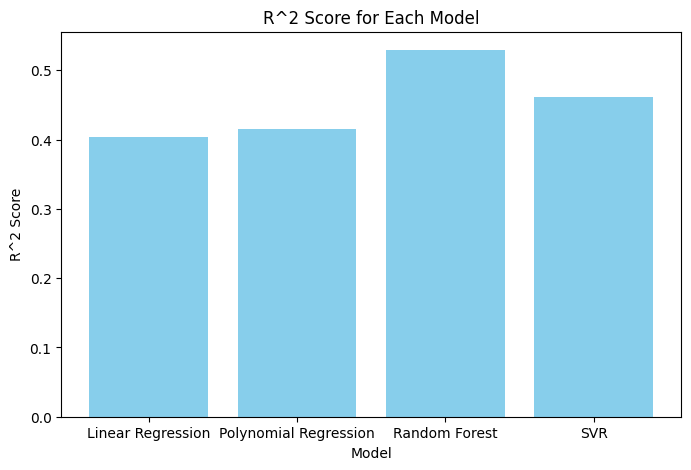

In [26]:
# Построение графика коэффициента детерминации
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color='skyblue')
plt.title('R^2 Score for Each Model')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.show()

График демонстрирует коэффициент детерминации (R^2) для каждой модели. Из графика можно сделать вывод о том, какая модель показывает наилучшую производительность по сравнению с другими. Таким образом, можно сделать вывод, что Random Forest показывает немного большую производительность по сравнению с другими

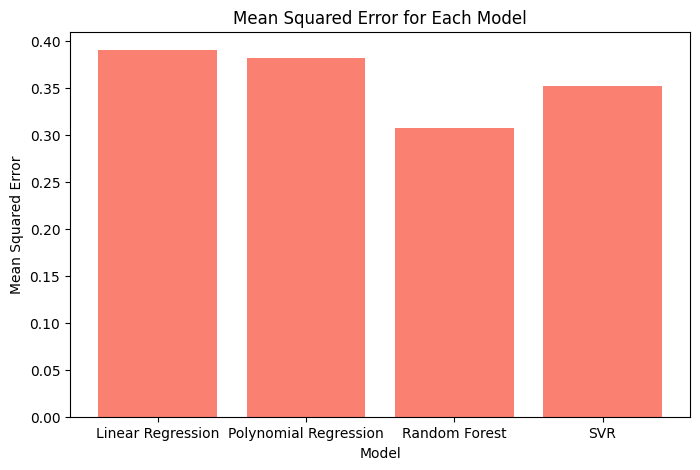

In [27]:
# Построение графика среднеквадратичной ошибки
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color='salmon')
plt.title('Mean Squared Error for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

График отображает значения среднеквадратичной ошибки для каждой модели в виде столбчатой диаграммы. Это позволяет визуально сравнить производительность различных моделей по значению MSE. Все модели находятся примерно на одном уровне, однако наилучшей стала - Linear Regression

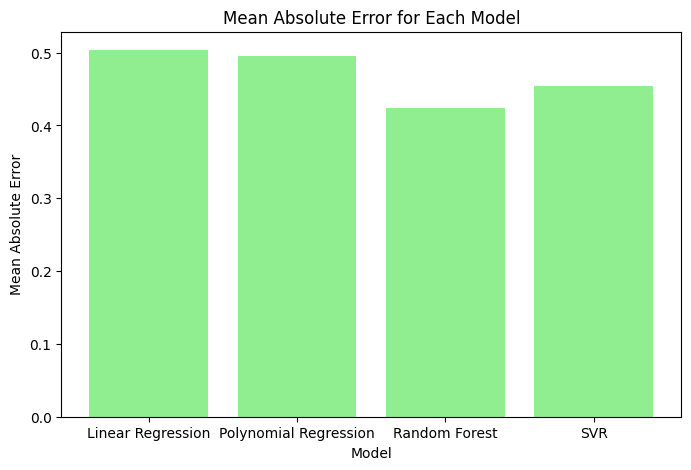

In [28]:
# Построение графика средней абсолютной ошибки
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color='lightgreen')
plt.title('Mean Absolute Error for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.show()

График демонстрирует значения средней абсолютной ошибки для каждой модели, используя столбчатую диаграмму. Это позволяет визуально сравнить производительность различных моделей по значению MAE. Все модели находятся примерно на одном уровне, однако наилучшей стала - Linear Regression

### Вывод
Исходя из результатов исследования, можно сделать вывод, что модель случайного леса показала наилучшую производительность среди всех рассмотренных моделей. Однако, для дальнейшего улучшения моделей можно проанализировать и изменить гиперпараметры текущих моделей.